<a href="https://colab.research.google.com/github/samipn/clustering_demos/blob/main/kmeans_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment (a): K-Means Clustering from Scratch

This notebook implements the K-Means clustering algorithm **from scratch**, compares it with `sklearn`'s implementation, and evaluates clustering quality using inertia and silhouette score.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans as SklearnKMeans

np.random.seed(42)
plt.rcParams["figure.figsize"] = (6, 6)


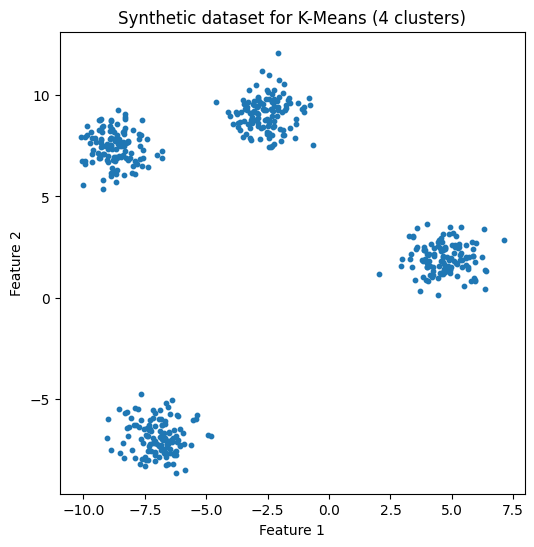

In [2]:
# Generate synthetic dataset
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=0.80,
    random_state=42
)

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Synthetic dataset for K-Means (4 clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [3]:
class KMeansScratch:
    """K-Means clustering implemented from scratch.

    Parameters
    ----------
    n_clusters : int
        Number of clusters (k).
    max_iter : int
        Maximum number of iterations.
    tol : float
        Tolerance for convergence based on centroid movement.
    random_state : int or None
        Random seed for centroid initialization.
    """
    def __init__(self, n_clusters=4, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state

        self.cluster_centers_ = None
        self.labels_ = None
        self.inertia_ = None

    def _init_centroids(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        indices = np.random.choice(len(X), size=self.n_clusters, replace=False)
        return X[indices]

    def _compute_distances(self, X, centroids):
        """Return matrix of Euclidean distances (n_samples x n_clusters)."""
        return np.linalg.norm(X[:, None, :] - centroids[None, :, :], axis=2)

    def fit(self, X):
        X = np.asarray(X)
        centroids = self._init_centroids(X)

        for iteration in range(self.max_iter):
            distances = self._compute_distances(X, centroids)
            labels = np.argmin(distances, axis=1)

            new_centroids = np.array([
                X[labels == k].mean(axis=0) if np.any(labels == k) else centroids[k]
                for k in range(self.n_clusters)
            ])

            shift = np.linalg.norm(new_centroids - centroids)
            centroids = new_centroids

            if shift < self.tol:
                print(f"Converged at iteration {iteration}")
                break

        self.cluster_centers_ = centroids
        self.labels_ = labels
        self.inertia_ = np.sum(
            np.min(self._compute_distances(X, self.cluster_centers_), axis=1) ** 2
        )
        return self

    def predict(self, X):
        distances = self._compute_distances(X, self.cluster_centers_)
        return np.argmin(distances, axis=1)

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_


Converged at iteration 4


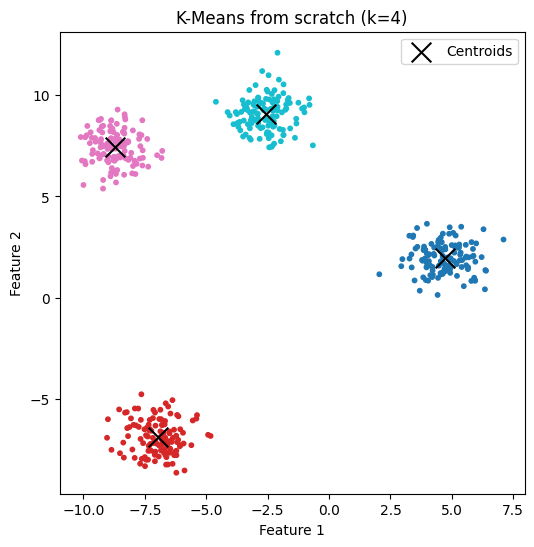

Inertia (SSE) from scratch: 607.2898197360988
Silhouette score from scratch: 0.8336135403234282


In [4]:
# Train KMeansScratch & visualize clusters
k = 4
kmeans_scratch = KMeansScratch(n_clusters=k, random_state=42)
labels_scratch = kmeans_scratch.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels_scratch, cmap='tab10', s=10)
plt.scatter(
    kmeans_scratch.cluster_centers_[:, 0],
    kmeans_scratch.cluster_centers_[:, 1],
    c='black', marker='x', s=200, label='Centroids'
)
plt.title(f"K-Means from scratch (k={k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

print("Inertia (SSE) from scratch:", kmeans_scratch.inertia_)
print("Silhouette score from scratch:", silhouette_score(X, labels_scratch))


Converged at iteration 1
Converged at iteration 5
Converged at iteration 4
Converged at iteration 14
Converged at iteration 11
Converged at iteration 10
Converged at iteration 7


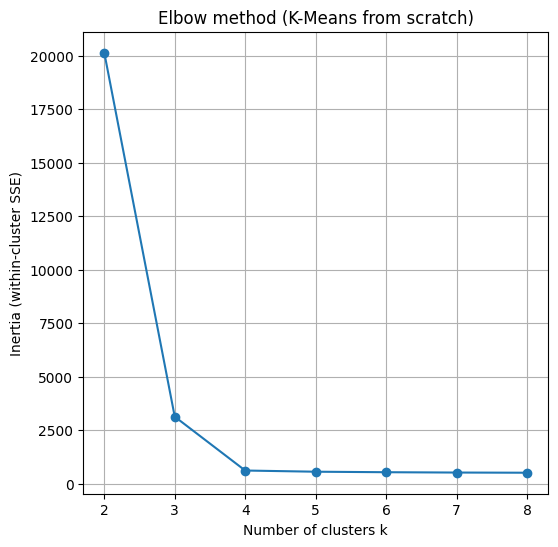

In [5]:
# Elbow method (SSE vs k) for our implementation
inertias = []
k_values = list(range(2, 9))  # k = 2..8

for k in k_values:
    model = KMeansScratch(n_clusters=k, random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of clusters k")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow method (K-Means from scratch)")
plt.grid(True)
plt.show()


Sklearn KMeans inertia: 607.2898197360992
Sklearn KMeans silhouette: 0.8336135403234282


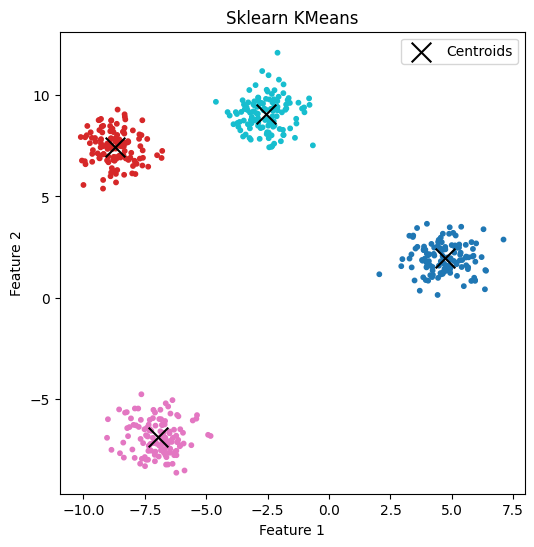

In [6]:
# Compare with sklearn's KMeans
sk_kmeans = SklearnKMeans(n_clusters=4, random_state=42, n_init=10)
labels_sk = sk_kmeans.fit_predict(X)

print("Sklearn KMeans inertia:", sk_kmeans.inertia_)
print("Sklearn KMeans silhouette:", silhouette_score(X, labels_sk))

plt.scatter(X[:, 0], X[:, 1], c=labels_sk, cmap='tab10', s=10)
plt.scatter(
    sk_kmeans.cluster_centers_[:, 0],
    sk_kmeans.cluster_centers_[:, 1],
    c='black', marker='x', s=200, label='Centroids'
)
plt.title("Sklearn KMeans")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
